# Assignment 12 Text Mining. Question :- 01
## Performing Sentimental Analysis.
### Quick info. about Text mining.
### Info. :- 
Text mining, also known as text data mining, is the process of transforming unstructured text into a structured format to identify meaningful patterns and new insights.
By applying advanced analytical techniques, such as Naïve Bayes, Support Vector Machines (SVM), and other deep learning algorithms, companies are able to explore and discover hidden relationships within their unstructured data.
#### Structured data:
This data is standardized into a tabular format with numerous rows and columns, making it easier to store and process for analysis and machine learning algorithms. Structured data can include inputs such as names, addresses, and phone numbers.
#### Unstructured data: 
This data does not have a predefined data format. It can include text from sources, like social media or product reviews, or rich media formats like, video and audio files.
#### Semi-structured data: 
As the name suggests, this data is a blend between structured and unstructured data formats. While it has some organization, it doesn’t have enough structure to meet the requirements of a relational database. Examples of semi-structured data include XML, JSON and HTML files.

In [1]:
# required Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk import tokenize

### Data Loading 

In [2]:
Elon_musk01 = pd.read_csv("D:\Data Science Material\Assignments\Text mining\Elon_musk.csv",encoding='ISO-8859-1')

In [3]:
Elon_musk01.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [4]:
Elon_musk01.tail()

,Unnamed: 0,Text
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...
1998,1999,Progress update August 28


In [5]:
Elon_musk01.describe()

,Unnamed: 0
count,1999.000000
mean,1000.000000
std,577.205914
min,1.000000
25%,500.500000
50%,1000.000000
75%,1499.500000
max,1999.000000


In [6]:
Elon_musk01.shape

(1999, 2)

In [7]:
Elon_musk01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [8]:
Elon_musk01.isna().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [9]:
Elon_musk = Elon_musk01.copy()

### Data Cleaning / Performing Sentimental Analysis

In [10]:
# importing Reguler expression
import re
import string

def clean_text(text):
    ''' make text lowercase, removing text in square bracket, removing punctuation and words containing numbers'''
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\w*\d\w*','',text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]','',text)
    return text

clean = lambda x: clean_text(x)

In [11]:
Elon_musk = Elon_musk.rename(columns = {'Unnamed: 0':'Index'})

In [12]:
Elon_musk

,Index,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [13]:
Elon_musk['Text'] = Elon_musk.Text.apply(clean)
Elon_musk.Text.head(10)

0                                          im an alien
1    idaacarmack ray tracing on cyberpunk with hdr ...
2                     joerogan spotify great interview
3                               doge is underestimated
4    teslacn congratulations tesla china for amazin...
5                            happy new year of the ox 
6    frodo was the underdoge\nall thought he would ...
7                     owensparks flcnhvy  haha thanks 
8    flcnhvy  indeed tweets definitely do not repre...
9     the most entertaining outcome is the most likely
Name: Text, dtype: object

In [14]:
# word frequency

freq = pd.Series(' '.join(Elon_musk['Text']).split()).value_counts()[0:20] # top 20
freq

the               486
to                400
is                355
a                 355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                135
on                129
that              128
rt                127
but               126
dtype: int64

In [15]:
# removing stop words

from nltk.corpus import stopwords
stop = stopwords.words('english')
Elon_musk['Text'] = Elon_musk['Text'].apply(lambda x:" ".join(x for x in x.split() if x not in stop))
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
# word freq after removing stop words

freq_sw = pd.Series(' '.join(Elon_musk['Text']).split()).value_counts()[:20] # top 20 rows
freq_sw

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
much                40
cleantechnica       40
dtype: int64

In [17]:
# count vectorizer tels the freq of the word.

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df = 1,max_df = 0.9)
x = vectorizer.fit_transform(Elon_musk['Text'])
word_freq_df = pd.DataFrame({'term':vectorizer.get_feature_names(),'occurrences':np.asarray(x.sum(axis = 0)).ravel().tolist()})
word_freq_df['Frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [18]:
word_freq_df.head(50)

,term,occurrences,Frequency
0,aber,1,0.000075
1,able,6,0.000453
2,abo,1,0.000075
3,aboard,1,0.000075
4,abort,3,0.000226
5,absence,1,0.000075
6,absolute,1,0.000075
7,absolutely,15,0.001132
8,absorb,1,0.000075
9,absorption,1,0.000075


In [19]:
# after cleaning the data look like
Elon_musk.head(50)

,Index,Text
0,1,im alien
1,2,idaacarmack ray tracing cyberpunk hdr nextleve...
2,3,joerogan spotify great interview
3,4,doge underestimated
4,5,teslacn congratulations tesla china amazing ex...
5,6,happy new year ox
6,7,frodo underdoge thought would fail httpstcozgx...
7,8,owensparks flcnhvy haha thanks
8,9,flcnhvy indeed tweets definitely represent rea...
9,10,entertaining outcome likely


In [20]:
# after cleaning the data look like
Elon_musk.tail(50)

,Index,Text
1949,1950,katlinegrey reusability essential rocket singl...
1950,1951,wild times
1951,1952,spaceflightnow extra paranoid maximizing proba...
1952,1953,summergamefest welcome anytime
1953,1954,bradyleonard well care much sustainability civ...
1954,1955,teslatn teslaratiteam teslarati dollyparton ye...
1955,1956,chrisjcav teslaratiteam teslarati
1956,1957,jaminwestby teslaownerssv teslaratiteam teslar...
1957,1958,teslaratiteam teslarati range testing number s...
1958,1959,teslaratiteam teslarati reduced pricing model ...


### Word Cloud 

In [21]:
string_total = " ".join(Elon_musk['Text'])

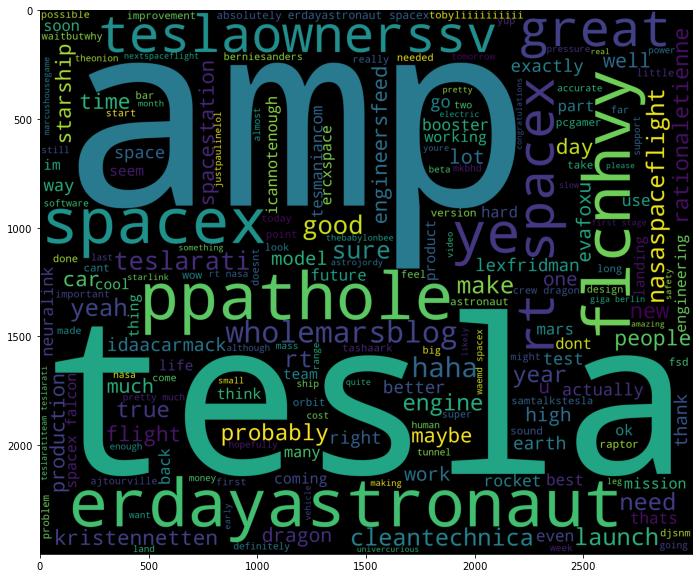

In [22]:
### word cloud for entire corpus

from wordcloud import WordCloud
plt.figure(figsize=(12,10))
wordcloud_spw = WordCloud(background_color = 'black',width = 3000,height= 2500).generate(string_total)
plt.imshow(wordcloud_spw)
plt.show()

#### N-gram

In [23]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
    

In [24]:
top2_words = get_top_n2_words(Elon_musk['Text'], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
5,waemd spacex,11
6,giga berlin,10
7,first stage,10
8,teslaratiteam teslarati,10
9,nasa spacex,9


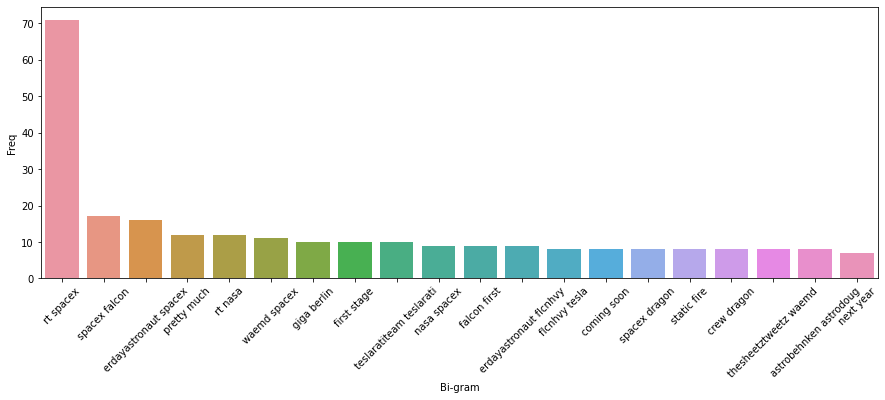

In [25]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (15, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"])
plt.show()

### Applying Classification

In [35]:
def split_into_words(i):
    return (i.split(" "))
    

In [37]:
from sklearn.model_selection import train_test_split

Elon_train,Elon_test = train_test_split(Elon_musk,test_size = 0.3)

In [28]:
Elon_train.shape

(1399, 2)

In [29]:
Elon_test.shape

(600, 2)

In [30]:
Elon_bow = CountVectorizer(analyzer = split_into_words).fit(Elon_musk['Text'])

In [31]:
Elon_bow

CountVectorizer(analyzer=<function split_into_words at 0x00000191010E2D30>)

In [32]:
# for all messages

all_Elon_metrix = Elon_bow.transform(Elon_musk['Text'])
all_Elon_metrix.shape

(1999, 4517)

In [33]:
# For training messages
train_Elon_metrix = Elon_bow.transform(Elon_train.Text)
train_Elon_metrix.shape

# For testing messages
testing_Elon_metrix = Elon_bow.transform(Elon_test.Text)
testing_Elon_metrix.shape

(600, 4517)

In [34]:
### using Gaussian Naive Bayes
#from sklearn.naive_bayes import GaussianNB as GB

#classifier_GB = GB()
#classifier_GB.fit(train_Elon_metrix,Elon_train.Text.values)
#train_pred_g = classifier_GB.predict(train_Elon_metrix.toarray())
#accuracy_train_m = np.mean(train_pred_g == Elon_train)
#accuracy_train_m